In [20]:
#Import Library
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB


Upload file .csv air

In [21]:
files.upload()

Saving water_potability.csv to water_potability (2).csv


{'water_potability (2).csv': b'ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability\r\n,204.8904554713363,20791.318980747026,7.300211873184757,368.51644134980336,564.3086541722439,10.3797830780847,86.9909704615088,2.9631353806316407,0\r\n3.71608007538699,129.42292051494425,18630.057857970347,6.635245883862,,592.8853591348523,15.180013116357259,56.32907628451764,4.500656274942408,0\r\n8.099124189298397,224.23625939355776,19909.541732292393,9.275883602694089,,418.6062130644815,16.868636929550973,66.42009251176368,3.0559337496641685,0\r\n8.316765884214679,214.37339408562252,22018.417440775294,8.05933237743854,356.88613564305666,363.2665161642437,18.436524495493302,100.34167436508008,4.628770536837084,0\r\n9.092223456290965,181.10150923612525,17978.98633892625,6.546599974207941,310.13573752420444,398.41081338184466,11.558279443446395,31.997992727424737,4.075075425430034,0\r\n5.584086638456089,188.3133237696164,28748.68773904612,7.544868788

In [22]:
# baca file air tersebut lalu tampilkan
df = pd.read_csv('/content/water_potability.csv')
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [23]:
# cek type data dari masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [24]:
# cek informasik statistik dari masing-masing kolom
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [26]:
# Melakukan cek terhadap kolom mana saja yang memiliki value Null
columns_with_nan = df.columns[df.isnull().any()].tolist()

# Membuat DataFrame untuk menampilkan kolom yang memiliki nilai null beserta tipe datanya
nan_info = pd.DataFrame({
    'Tipe Data': df[columns_with_nan].dtypes,
    'Jumlah Null': df[columns_with_nan].isnull().sum()
})

print("Kolom yang memiliki nilai Null beserta tipe datanya:")
print(nan_info)

Kolom yang memiliki nilai Null beserta tipe datanya:
                Tipe Data  Jumlah Null
ph                float64          491
Sulfate           float64          781
Trihalomethanes   float64          162


In [34]:
# Melakukan cek terhadap kolom mana saja yang memiliki value Null
columns_with_nan = df_cleaned.columns[df_cleaned.isnull().any()].tolist()

# Membuat DataFrame untuk menampilkan kolom yang memiliki nilai null beserta tipe datanya
nan_info = pd.DataFrame({
    'Tipe Data': df_cleaned[columns_with_nan].dtypes,
    'Jumlah Null': df_cleaned[columns_with_nan].isnull().sum()
})

print("Kolom yang memiliki nilai Null beserta tipe datanya:")
print(nan_info)
print("Jumlah akhir dataset: ",df_cleaned.shape)

Kolom yang memiliki nilai Null beserta tipe datanya:
Empty DataFrame
Columns: [Tipe Data, Jumlah Null]
Index: []
Jumlah akhir dataset:  (2011, 10)


In [35]:
#Mengcopy dataset agar dataset original tidak terpengaruhi
df_cleaned = df.copy()

In [36]:
# Melakukan drop terhadap kolom yang memiliki jumlah Null
df_cleaned = df_cleaned.dropna(subset=['ph', 'Sulfate','Trihalomethanes'])

In [37]:
# Cek jumlah baris dan kolom
df.shape

(3276, 10)

In [38]:
# Cek jumlah duplikat
df.duplicated().sum()

0

In [39]:
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [40]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2011.000000  2011.000000   2011.000000  2011.000000  2011.000000   
mean      7.085990   195.968072  21917.441374     7.134338   333.224672   
std       1.573337    32.635085   8642.239815     1.584820    41.205172   
min       0.227499    73.492234    320.942611     1.390871   129.000000   
25%       6.089723   176.744938  15615.665390     6.138895   307.632511   
50%       7.027297   197.191839  20933.512750     7.143907   332.232177   
75%       8.052969   216.441070  27182.587067     8.109726   359.330555   
max      14.000000   317.338124  56488.672413    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   2011.000000     2011.000000      2011.000000  2011.000000  2011.000000  
mean     426.526409       14.357709        66.400859     3.969729     0.403282  
std       80.712572        3.324959        16.077109     0.780346     0.490678  
min      201.619737        2.200000         8.577013     1.450000     0.000000  
25%      366.680307       12.124105        55.952664     3.442915     0.000000  
50%      423.455906       14.322019        66.542198     3.968177     0.000000  
75%      482.373169       16.683049        77.291925     4.514175     1.000000  
max      753.342620       27.006707       124.000000     6.494749     1.000000

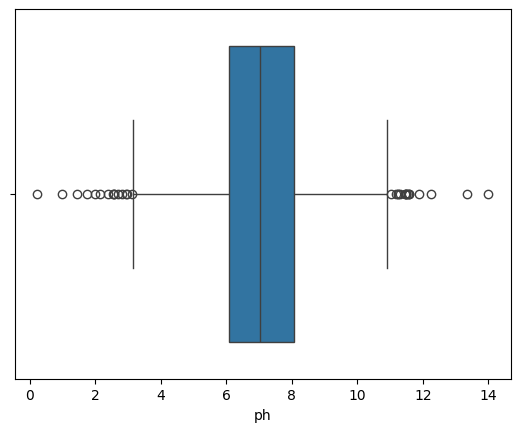

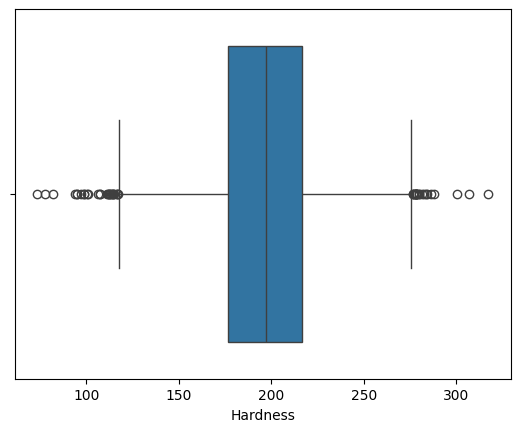

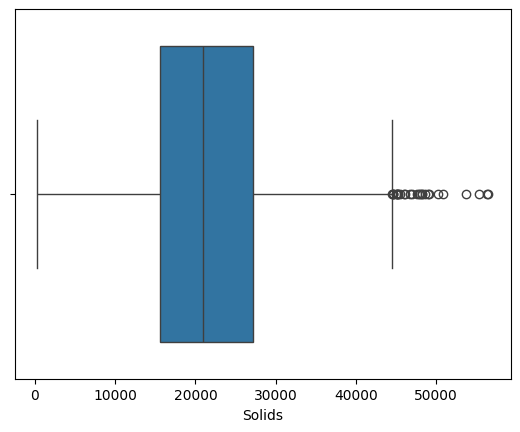

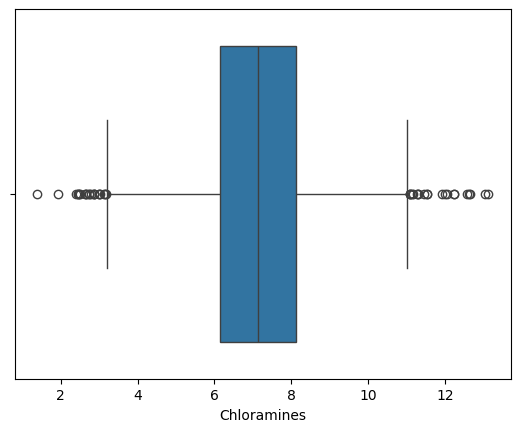

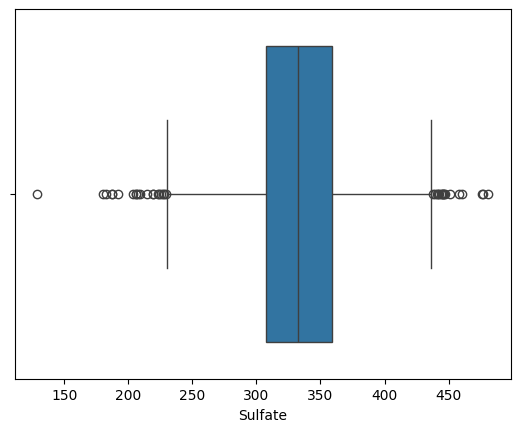

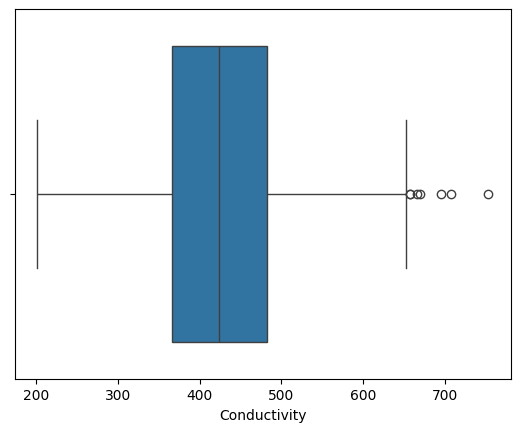

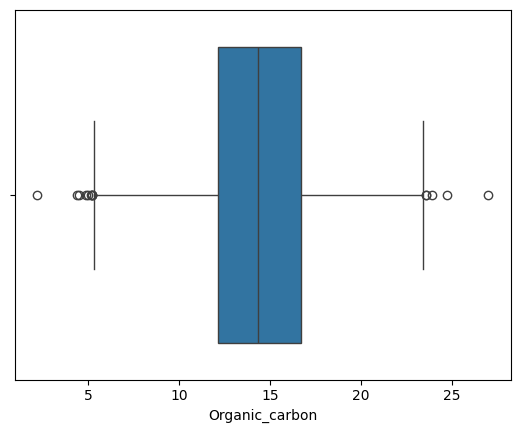

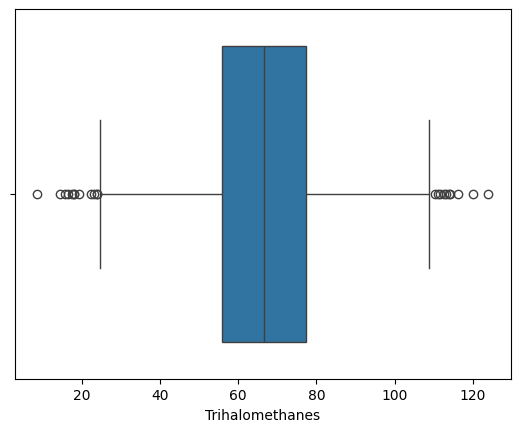

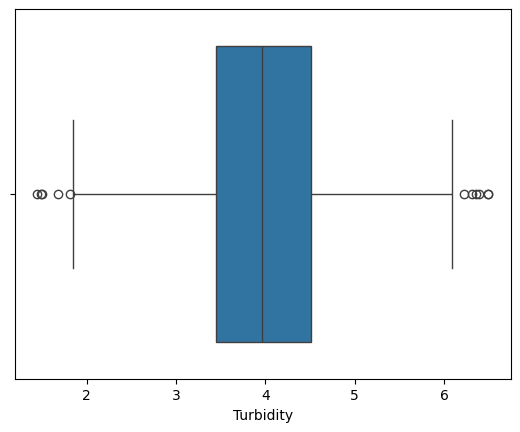

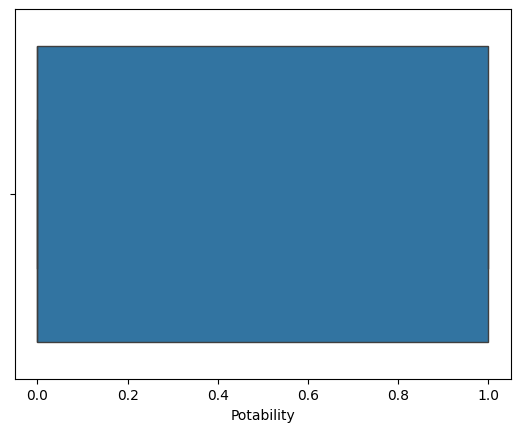

In [41]:
# Visualisasi Outlier
df_outlier=df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure()
        sns.boxplot(data=df_outlier, x=column)

In [42]:
# Menghapus outliers yang ada pada dataset
for col in df.select_dtypes(include=['object']).columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        print(f"Could not convert column '{col}' to numeric. Check for non-numeric values. Consider dropping or using other encoding methods.")
        # Handle columns that couldn't be converted, e.g., drop them or use one-hot encoding
        # df = df.drop(columns=[col])  # Example: dropping the column

# Now proceed with the quantile calculation
# Select only numeric columns for quantile calculation
numeric_df = df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [43]:
# Cek Jumlah Datasets setalah kita hapus Outlier:
df.shape

(1794, 10)

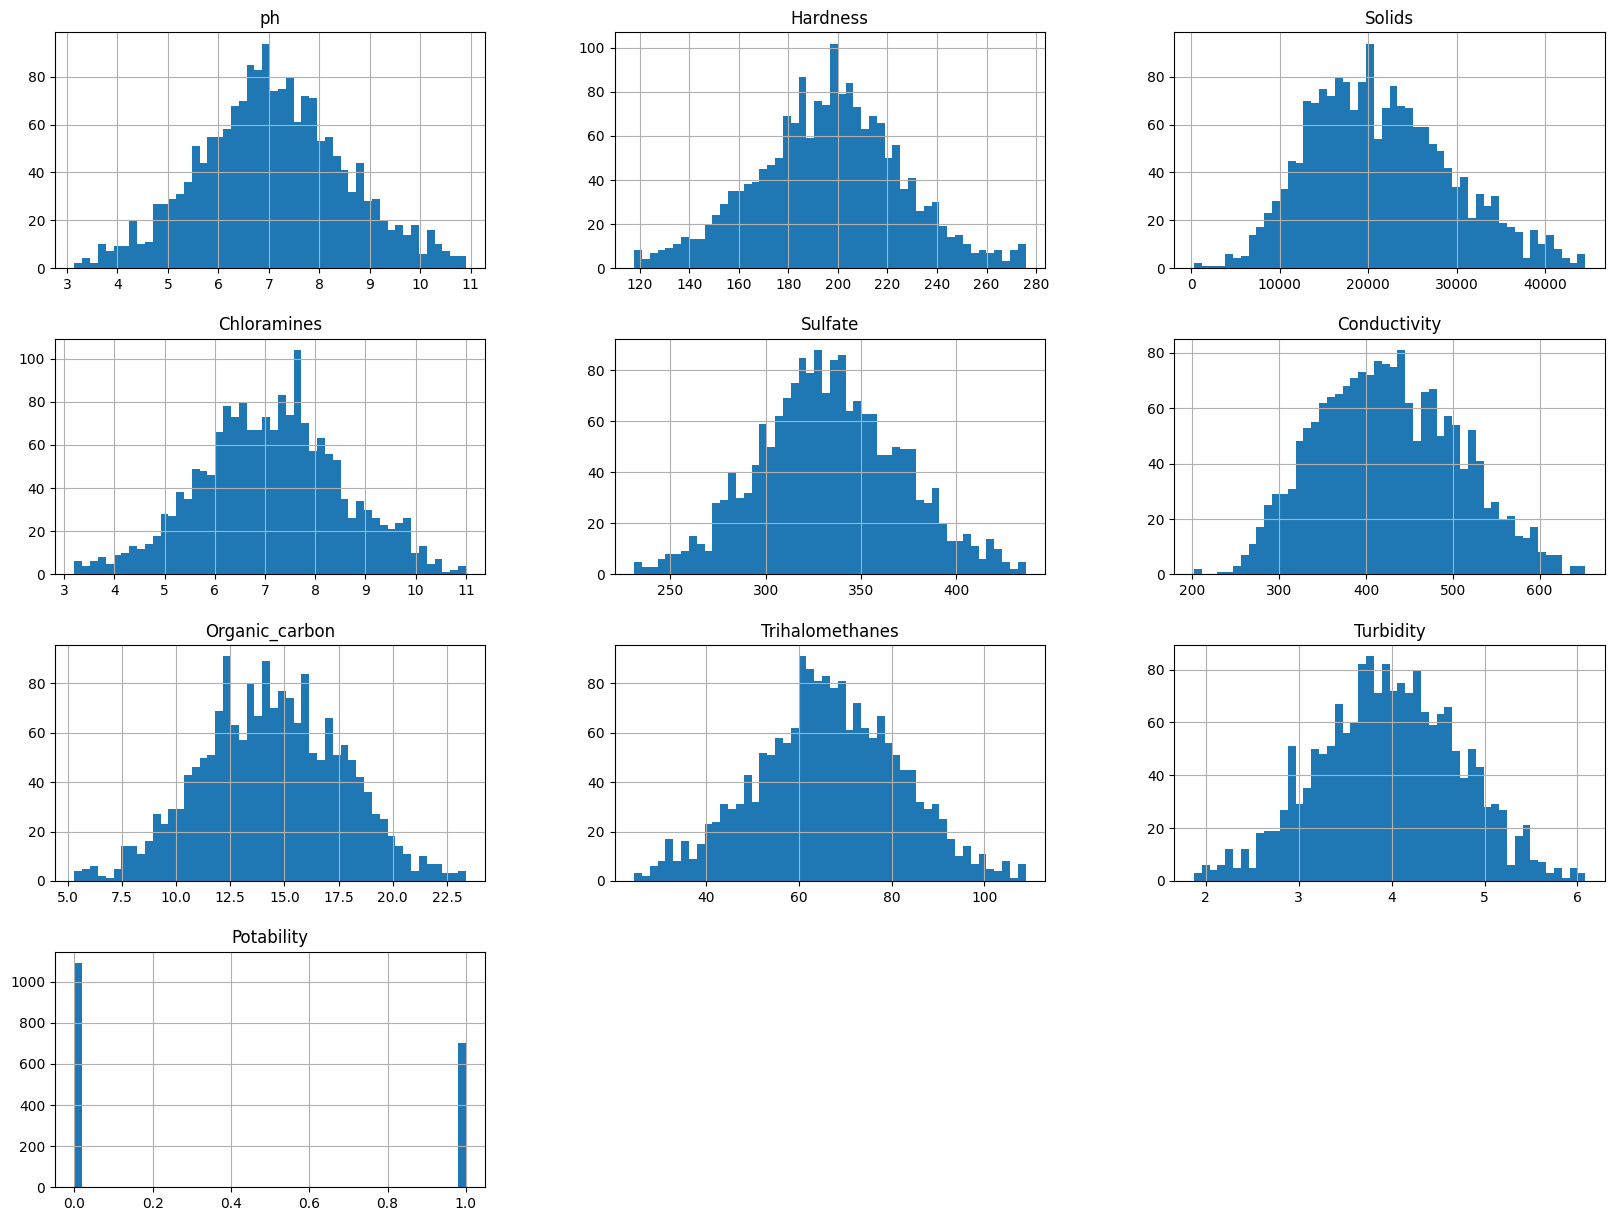

In [44]:
# Lakukan EDA - Univariate Analysis
df.hist(bins=50, figsize=(20,15))
plt.show()

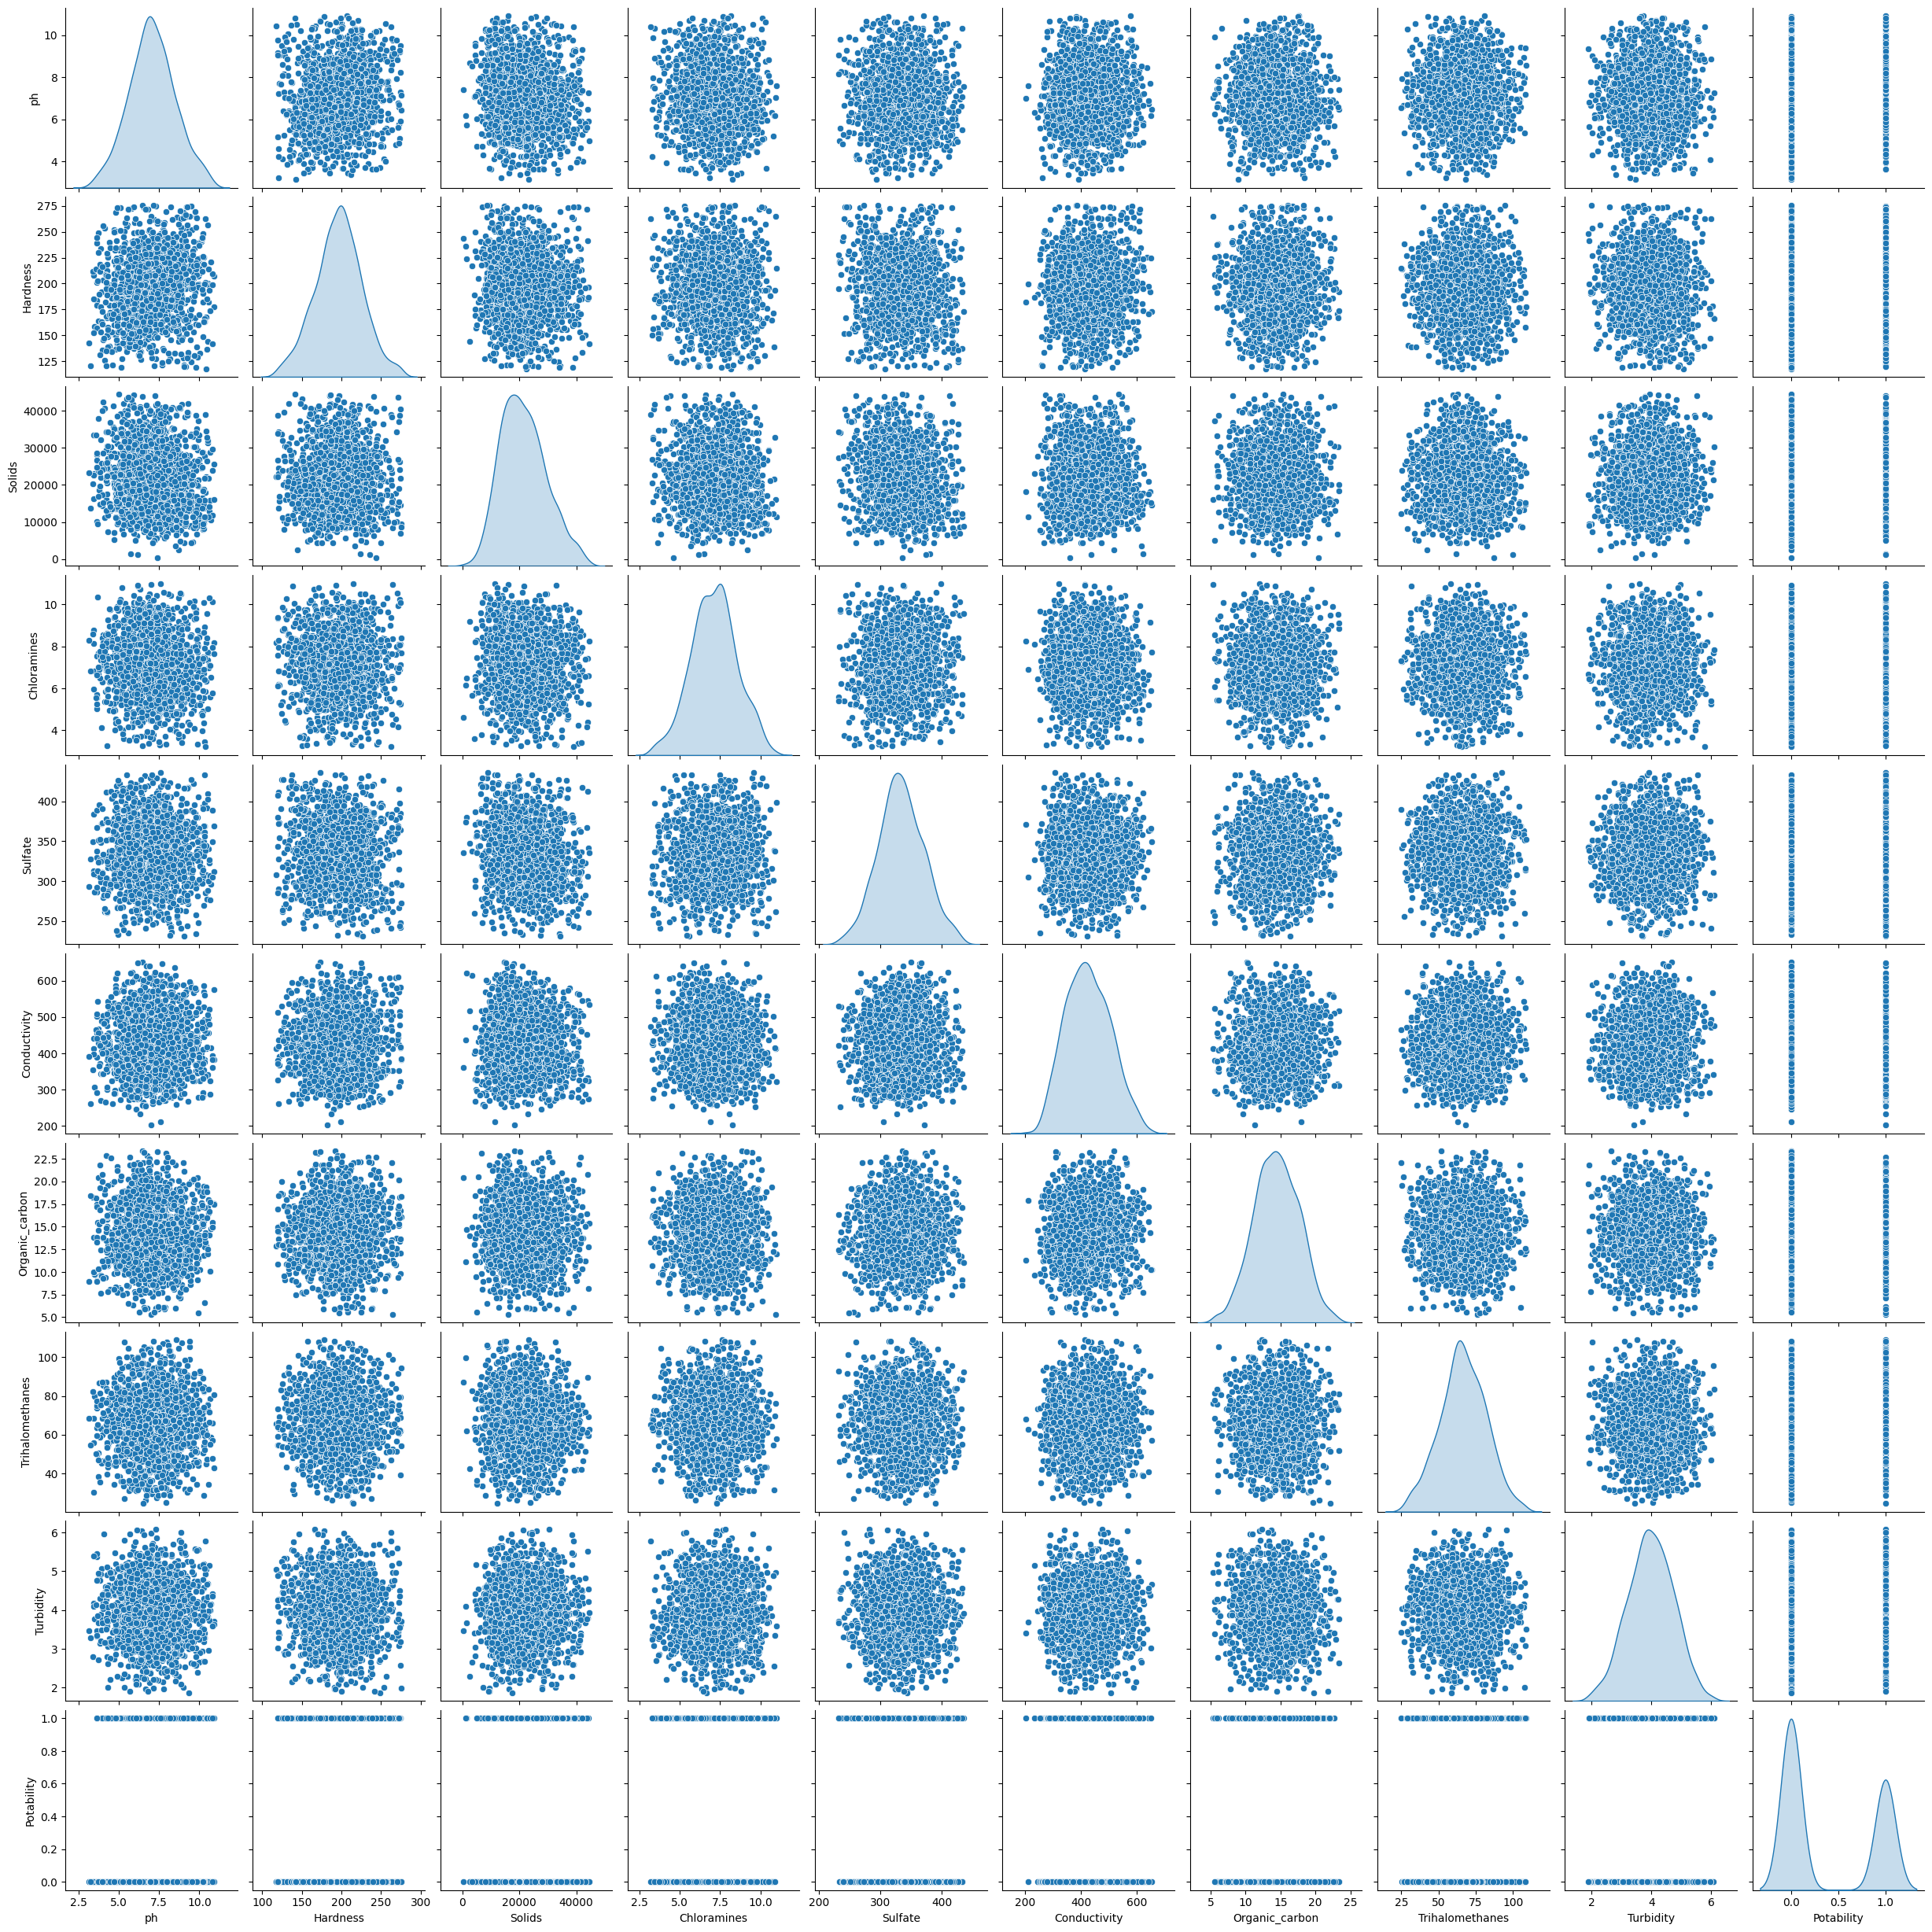

In [45]:
# Lakukan EDA - Multivariate Analysis
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Matriks Korelasi Antar Kolo, ')

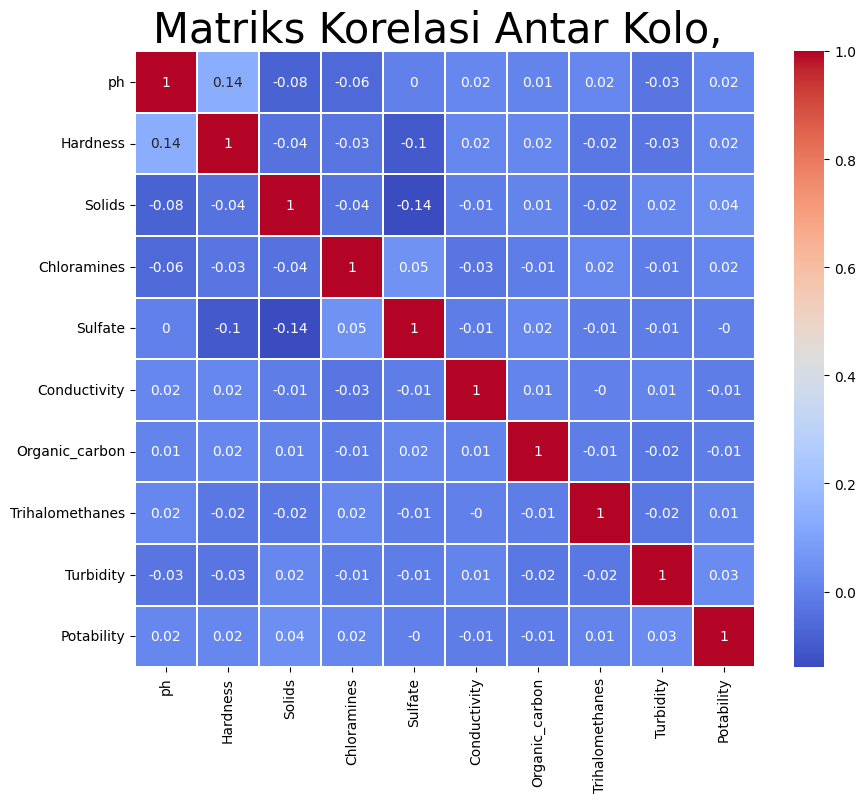

In [46]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.3, )
plt.title(f"Matriks Korelasi Antar Kolo, ", size=30)

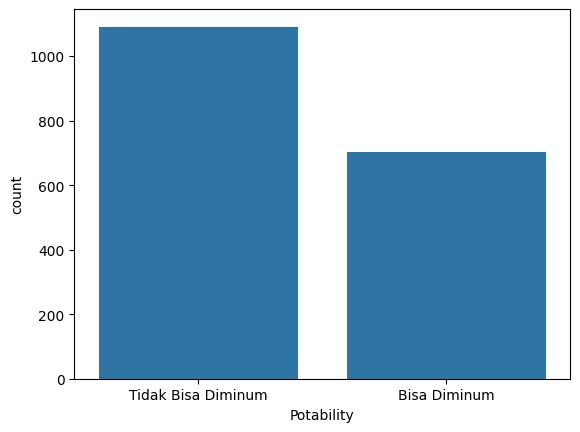

In [47]:
ax = sns.countplot(x="Potability", data=df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels=["Tidak Bisa Diminum", "Bisa Diminum"])
plt.show()

In [48]:
x = df.drop("Potability",axis=1)
y = df.Potability

x.shape,y.shape

((1794, 9), (1794,))

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=70)

In [50]:

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [51]:
!pip install lazypredict

In [52]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier()
models,predicts = clf.fit(x_train,x_test,y_train,y_test)
print(models.sort_values(by="Accuracy",ascending=False))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
 97%|█████████▋| 31/32 [00:09<00:00,  1.48it/s]

[LightGBM] [Info] Number of positive: 512, number of negative: 743
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1255, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.407968 -> initscore=-0.372371
[LightGBM] [Info] Start training from score -0.372371


100%|██████████| 32/32 [00:10<00:00,  3.11it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.71               0.62     0.62      0.68   
RandomForestClassifier             0.69               0.62     0.62      0.67   
NuSVC                              0.67               0.63     0.63      0.67   
BaggingClassifier                  0.67               0.61     0.61      0.66   
LGBMClassifier                     0.67               0.62     0.62      0.66   
QuadraticDiscriminantAnalysis      0.67               0.60     0.60      0.65   
KNeighborsClassifier               0.65               0.60     0.60      0.64   
ExtraTreesClassifier               0.65               0.58     0.58      0.63   
RidgeClassifier                    0.65               0.50     0.50      0.51   
LinearSVC                          0.65               0.50     0.50      0.51   
RidgeClassifierCV           

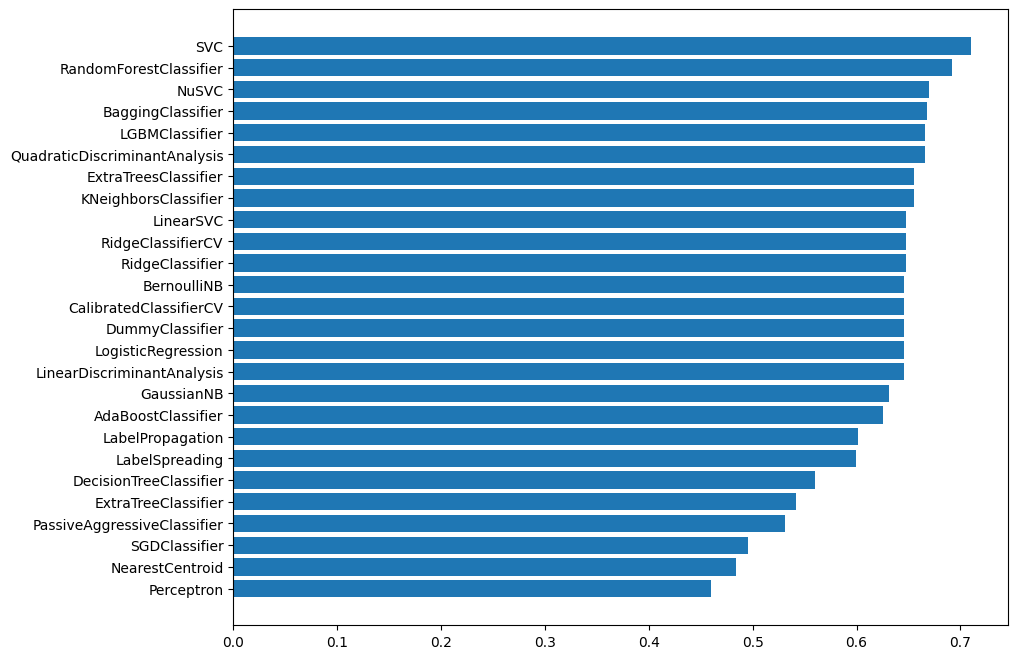

In [53]:
temp = models.sort_values(by="Accuracy",ascending=True)
plt.figure(figsize=(10, 8))
plt.barh(temp.index,temp["Accuracy"])
plt.show()

In [54]:
models = pd.DataFrame(index=['accuracy_score'],
                      columns=['KNN', 'RandomForest', 'SVM', 'Naive Bayes','Extra trees classifier'])

In [55]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Explore different values for k
    'weights': ['uniform', 'distance'],  # Explore different weight functions
    'metric': ['euclidean', 'manhattan']  # Explore different distance metrics
}

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_knn = grid_search.best_estimator_

# Evaluate the best model on the test data
knn_pred = best_knn.predict(x_test)
models.loc['accuracy_score', 'KNN'] = accuracy_score(y_test, knn_pred)

print(f"Accuracy of the best KNN model: {accuracy_score(y_test, knn_pred)}")

Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy of the best KNN model: 0.6920222634508348


In [56]:
model_knn = KNeighborsClassifier(n_neighbors=2, weights='uniform', metric= 'euclidean')
model_knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [57]:
knn_pred = model_knn.predict(x_test)
models.loc['accuracy_score','KNN'] = accuracy_score(y_test, knn_pred)

In [58]:
model_rf = RandomForestClassifier(max_depth= 20)
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=20)

In [59]:
rf_pred = model_rf.predict(x_test)
models.loc['accuracy_score','RandomForest'] = accuracy_score(y_test, rf_pred)


In [60]:
model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [61]:

svc_pred = model_svc.predict(x_test)
models.loc['accuracy_score','SVM'] = accuracy_score(y_test, svc_pred)

In [62]:
model_nb = BernoulliNB()
model_nb.fit(x_train, y_train)

BernoulliNB()

In [63]:
nb_pred = model_nb.predict(x_test)
models.loc['accuracy_score','Naive Bayes'] = accuracy_score(y_test, nb_pred)

In [64]:

model_etc = ExtraTreesClassifier(n_estimators=100, max_depth= 10,n_jobs= 2,random_state= 100)
model_etc.fit(x_train, y_train)

ExtraTreesClassifier(max_depth=10, n_jobs=2, random_state=100)

In [65]:
etc_pred = model_etc.predict(x_test)
models.loc['accuracy_score','Extra trees classifier'] = accuracy_score(y_test, etc_pred)

In [66]:
print(models)

                KNN RandomForest  SVM Naive Bayes Extra trees classifier
accuracy_score 0.66         0.68 0.71        0.65                   0.68


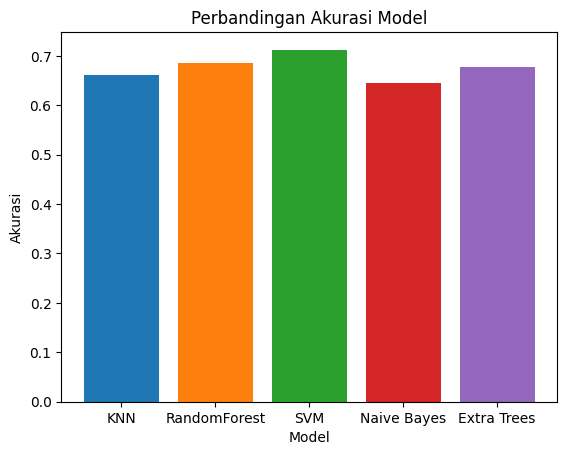

In [67]:
plt.bar('KNN', models['KNN'])
plt.bar('RandomForest', models['RandomForest'])
plt.bar('SVM', models['SVM'])
plt.bar('Naive Bayes', models['Naive Bayes'])
plt.bar('Extra Trees', models['Extra trees classifier'])
plt.title("Perbandingan Akurasi Model");
plt.xlabel('Model');
plt.ylabel('Akurasi');
plt.show()